In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

gmaps.configure(api_key=g_key)

In [36]:
# File to Load
file_to_load = "2010-2019_Crime.csv"

# Read Purchasing File and store into Pandas data frame
crime_df = pd.read_csv(file_to_load)
# crime_df

In [ ]:
# Input to draw modified Line Graph

In [25]:
crime_type_df = crime_df.filter(['Year',
                                 'Violent',
                                 'Gun_Violence',
                                 'Weapon',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])
# crime_type_df

# GroupBy Year
year_group = crime_type_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
# Calculate Weponry Crimes
weapon_crimes = pd.DataFrame(year_group["Weapon"].sum())
# weapon_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# sexual_crimes

In [28]:
# Merge Crime Calculations
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, weapon_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, robbery_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, vandalism_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, fraud_crimes, on='Year')
merge_table5

merge_table6 = pd.merge(merge_table5, drug_crimes, on='Year')
merge_table6

crime_type_totals = pd.merge(merge_table6, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
crime_type_totals
# crime_type_df = pd.merge(crime_type_df, robbery_crimes, on 'Year')
# crime_type_df

# # Merge data frames
# merge_table = pd.merge(age_group_purchase_count, avg_age_group_purchase_price,on="Age Group")
# merge_table

# # Display the summary data frame
# age_group_purchases = pd.merge(merge_table, age_group_purchase_value, on="Age Group")
# # age_group_purchases

,Year,Violent,Gun_Violence,Weapon,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,2010,87084,9771,21525,14272,38137,12802,43387,4888
1,2011,81834,9684,20439,13979,35068,12654,38599,4552
2,2012,79789,9828,19770,13484,34007,12821,35487,4212
3,2013,72133,7966,16544,11820,28936,12682,34129,3732
4,2014,65666,7613,15854,9799,26298,10390,29128,3708
5,2015,65307,8357,16635,9638,27658,8544,23940,3527
6,2016,70792,11524,20331,11960,30119,9603,13311,2819
7,2017,69797,10594,19671,11880,28124,10413,11673,3010
8,2018,68639,9601,18661,9680,26928,12213,13439,3183
9,2019,66464,8563,17369,8000,25650,11170,13875,3026


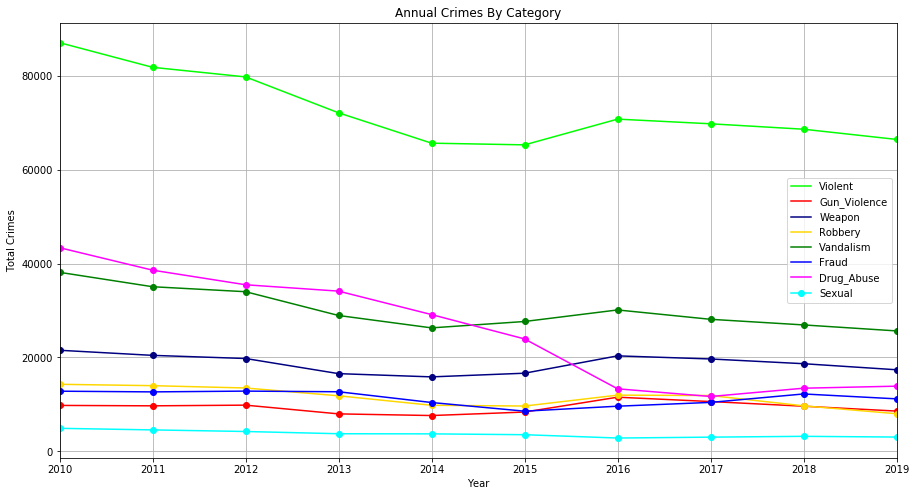

In [33]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Weapon',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'blue', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Crimes By Category")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)

# Save the Figure
plt.savefig('annual_crimes.png')

plt.show()

In [20]:
# Annual Gun Violence per Community DataFrame

# Top 9 communities with over 3,400 Gun Violence Crimes 2010-2019
gun_violence_df = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]
# gun_violence_df

gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
# gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Minor Data Munging to Re-Format the Data Frames
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
gun_violence_df


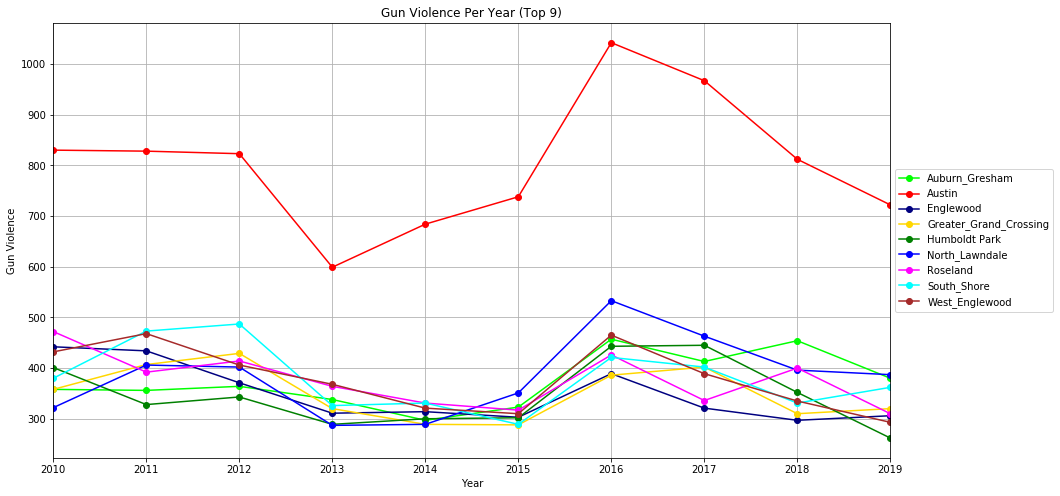

In [12]:
# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('annual_gun_violence.png')
# plt.grid(axis='y')
plt.show()

In [11]:
gun_violence_comm = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]

gun_violence_areas = gun_violence_comm.filter(['Area','Community'])
gun_violence_areas = gun_violence_areas.drop_duplicates()
gun_violence_areas

,Area,Community
357,Far Southeast Side,Roseland
453,Far Southwest Side,Auburn Gresham
804,Southside,Greater Grand Crossing
872,Southside,South Shore
998,Southwest Side,Englewood
1105,Southwest Side,West Englewood
1145,West Side,Austin
1188,West Side,Humboldt Park
1248,West Side,North Lawndale


In [21]:
# Violent Crimes vs # of Arrests
arrest_df = crime_df.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that = 0 under Violent
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Calculate No Arrests
arrest_df['No_Arrests'] = arrest_df['Violent'] - arrest_df['Arrests']
arrest_df

# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "Arrests", "No_Arrests"])
# v_crime_arrests

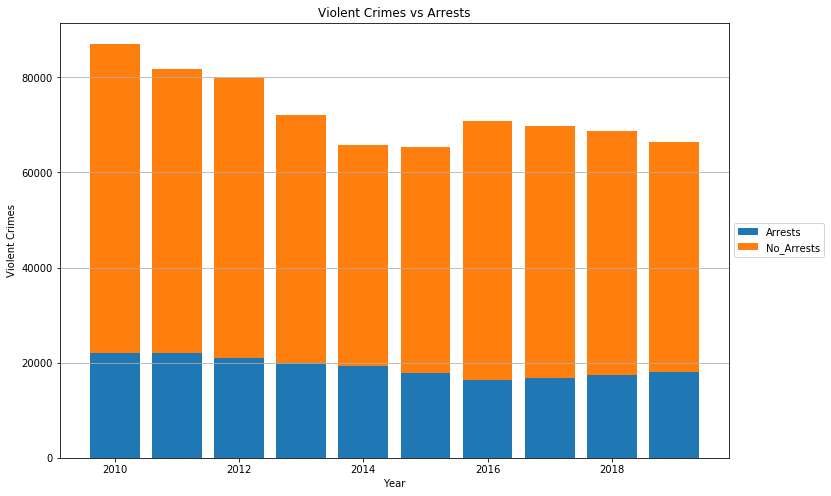

In [17]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('v_crime_arrests.png')

plt.show()

In [ ]:
# https://stackoverflow.com/questions/49889398/plot-stacked-bar-chart-from-pandas-data-frame

# cumval=0
# fig = plt.figure(figsize=(12,8))
# for col in payout_df.columns[~payout_df.columns.isin(['payout'])]:
#     plt.bar(payout_df.payout, payout_df[col], bottom=cumval, label=col)
#     cumval = cumval+payout_df[col]

In [ ]:
# # Filter Focus Communities
# community_df = crime_df[(crime_df.Community == 'Rogers Park')|
#                         (crime_df.Community == 'South Chicago')|
#                         (crime_df.Community == 'Logan Square')|
#                         (crime_df.Community == 'Englewood')|
#                         (crime_df.Community == 'Humboldt Park')|
#                         (crime_df.Community == 'Loop')|
#                         (crime_df.Community == 'Morgan Park')|
#                         (crime_df.Community == 'Portage Park')|
#                         (crime_df.Community == 'Hyde Park')]
# # community_df

# # Focus Communities :"Loop","Rogers Park","South Chicago", "Morgan Park", "Logan Square", "Portage Park",
# # "Hyde Park", "Englewood", "Humboldt Park"


In [37]:
# Store latitude and longitude in locations
locations = crime_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
crime_rate = crime_df["Crimes"].astype(float)

In [5]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=crime_rate, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

InvalidPointException: nan is not a valid longitude. Longitudes must lie between -180 and 180.